# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])

# Rename headers
merge_df = merge_df.rename(columns={'Age_months' : 'Age w/(months)'})

# Display the data table for preview
merge_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age w/(months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
total_mice = len(merge_df['Mouse ID'].unique())
print(f'Number of mice in all treatment regimens is: {total_mice}')

Number of mice in all treatment regimens is: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
same_mice = merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
same_mice_ID = merge_df.loc[same_mice, 'Mouse ID'].unique()
same_mice_ID


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
same_mice_data = merge_df.loc[merge_df['Mouse ID'] == same_mice_ID[0]]
same_mice_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age w/(months),Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_analysis = merge_df.loc[merge_df['Mouse ID'] != same_mice_ID[0]]
clean_analysis


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age w/(months),Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_analysis_check = len(clean_analysis['Mouse ID'].unique())
print(f'Number of mice in all treatment regimens is: {clean_analysis_check} (removed duplicate mice data)')

Number of mice in all treatment regimens is: 248 (removed duplicate mice data)


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_gp = clean_analysis.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

median = tumor_gp['Tumor Volume (mm3)'].median()
mean = tumor_gp['Tumor Volume (mm3)'].mean()
var = tumor_gp['Tumor Volume (mm3)'].var()
std = tumor_gp['Tumor Volume (mm3)'].std()
sem = tumor_gp['Tumor Volume (mm3)'].sem()

summary_of_tumor = pd.DataFrame({'Mean' : mean,
                                 'Median' : median,
                                 'Variance' : var,
                                 'Standard Deviation' : std,
                                 'SEM' : sem})

print('Probability 1')
summary_of_tumor

Probability 1


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
#  SEM of the tumor volume for each regimen (only one method is required in the solution)
table_summary = tumor_gp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
table_agg = table_summary.rename(columns={'mean' : 'Mean',
                                          'median' : 'Median',
                                          'var' : 'Variance',
                                          'std' : 'Standard Deviation',
                                          'sem' : 'SEM'})



# Using the aggregation method, produce the same summary statistics in a single line
print('Probability 2')
table_agg


Probability 2


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

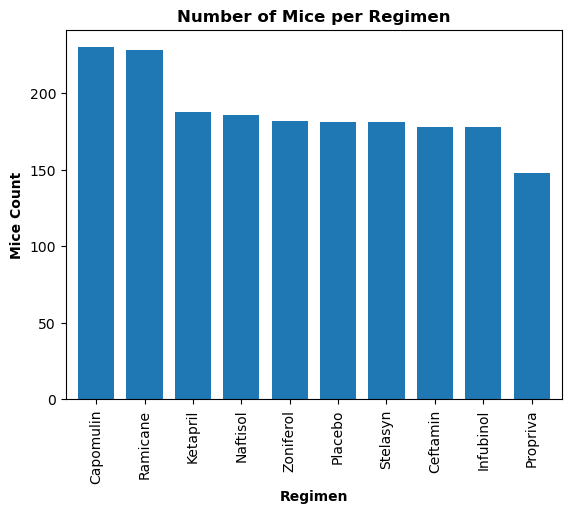

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_regimen = tumor_gp['Mouse ID'].count().sort_values(ascending=False)
mice_regimen

bar_mice_regimen = mice_regimen.plot(kind='bar', width=0.75)

# x/y label title
bar_mice_regimen.set_title(label='Number of Mice per Regimen', fontweight = 'bold')
bar_mice_regimen.set_xlabel('Regimen', fontweight = 'bold')
bar_mice_regimen.set_ylabel('Mice Count', fontweight = 'bold')

# present bar chart
plt.show()

# close pyplot
plt.close()



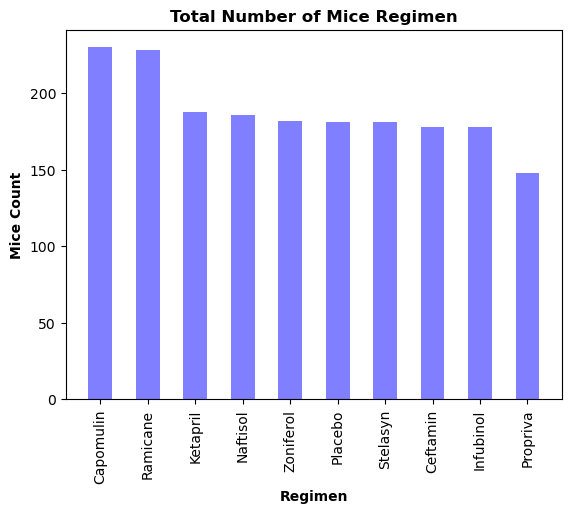

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# x axis
reg_x_axis = np.arange(len(mice_regimen))
reg_name = list(mice_regimen.index.values)

# create bar chart
bar_py_reg_mice = plt.bar(reg_x_axis, mice_regimen, color='blue', alpha=0.5, width=0.5)

# x/y label title
plt.xticks(reg_x_axis, reg_name, rotation='vertical')
plt.title('Total Number of Mice Regimen', fontweight = 'bold')
plt.xlabel('Regimen', fontweight = 'bold')
plt.ylabel('Mice Count', fontweight = 'bold')

plt.show()

plt.close()


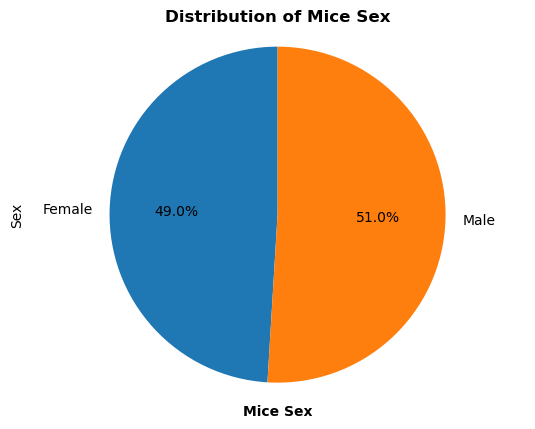

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_sex = clean_analysis.groupby('Sex')['Sex'].count()
mice_sex

# create pie chart
pie_mice_sex = mice_sex.plot(kind='pie', autopct= '%1.1f%%', startangle=90)

# create perfect circle w/ axis
plt.axis('equal')

#x/y label title
pie_mice_sex.set_title(label='Distribution of Mice Sex', fontweight = 'bold')
pie_mice_sex.set_xlabel('Mice Sex', fontweight = 'bold')

plt.show()

plt.close()



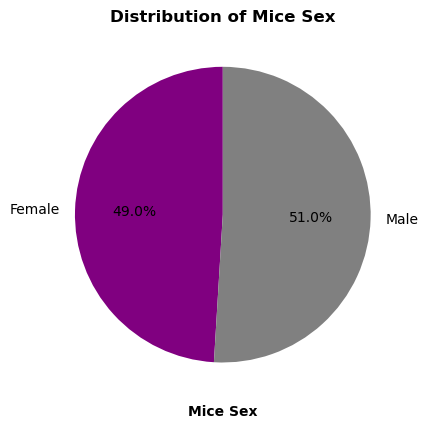

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_sex_2 = mice_sex.index
colors = ['purple', 'grey']

# make pie chart
py_mice_sex = plt.pie(mice_sex, labels=mice_sex.index, autopct='%1.1f%%', colors=colors, startangle=90)

# x/y label title
plt.title('Distribution of Mice Sex', fontweight = 'bold')
plt.xlabel('Mice Sex', fontweight = 'bold')

plt.show()

plt.close()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_tp = clean_analysis.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].max()
last_tp

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tp_df = pd.DataFrame(last_tp)
tp_df = pd.merge(last_tp, clean_analysis, on=('Drug Regimen', 'Mouse ID', 'Timepoint'), how='left')
tp_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age w/(months),Weight (g)
0,Capomulin,b128,45,38.982878,2,Female,9,22
1,Capomulin,b742,45,38.939633,0,Male,7,21
2,Capomulin,f966,20,30.485985,0,Male,16,17
3,Capomulin,g288,45,37.074024,1,Male,3,19
4,Capomulin,g316,45,40.159220,2,Female,22,22
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,70.827796,2,Male,12,25
244,Zoniferol,s337,45,62.109651,4,Male,14,27
245,Zoniferol,w140,5,47.717952,0,Female,19,30
246,Zoniferol,w575,45,68.401286,3,Female,16,28


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
medicine = ["Campomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in medicine:
    vol_df = tp_df.loc[tp_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    tumor_vol_data.append(vol_df)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartile = vol_df.quantile([0.25,0.5,0.75])

     # add subset 
    sub_set = quartile[0.75] - quartile[0.25]
    low_bound = quartile[0.25] - (1.5*sub_set)
    high_bound = quartile[0.75] + (1.5*sub_set)
    
    # Determine outliers using upper and lower bounds
    outliers = vol_df.loc[(vol_df > high_bound) | (vol_df < low_bound)]
    print(f"Outlier:{(outliers)}")

Outlier:Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier:Series([], Name: Tumor Volume (mm3), dtype: float64)
Outlier:55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outlier:Series([], Name: Tumor Volume (mm3), dtype: float64)


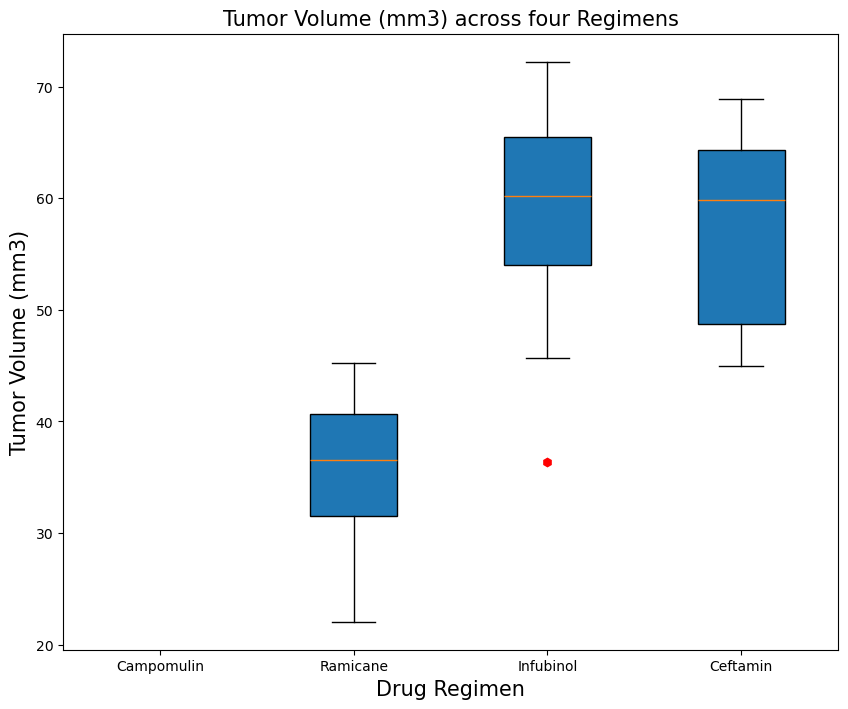

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
box_one = dict(markerfacecolor="r",marker="h",markeredgecolor="r")
fig1, ax1 = plt.subplots(figsize=(10,8))
ax1.boxplot(tumor_vol_data, flierprops=box_one, patch_artist=True)
ax1.set_title("Tumor Volume (mm3) across four Regimens",fontsize =15)
ax1.set_xlabel("Drug Regimen",fontsize = 15)
ax1.set_ylabel("Tumor Volume (mm3)",fontsize = 15)
ax1.xaxis.set(ticks=range(1,len(medicine) + 1),ticklabels=medicine)

plt.show()



## Line and Scatter Plots

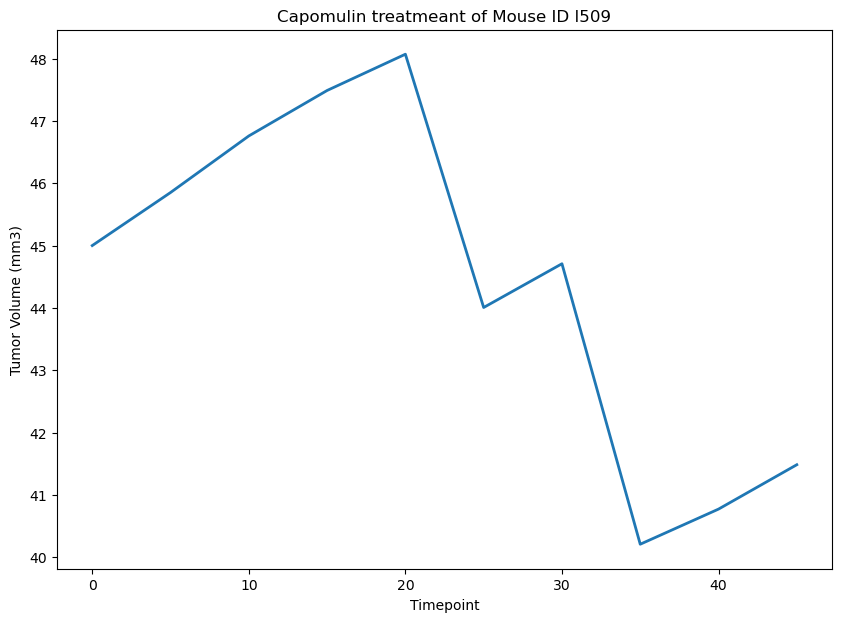

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = clean_analysis.loc[clean_analysis["Mouse ID"] == "l509",:]
line_plot

time = line_plot["Timepoint"]
vol_ume = line_plot["Tumor Volume (mm3)"]

plt.figure(figsize=(10,7))
line, = plt.plot(time, vol_ume, linewidth=2, markersize=12)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatmeant of Mouse ID l509")

plt.show()

In [27]:
# Filter the data to only include the Capomulin treatment regimen
capomulin_data = total_mice[total_mice['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse in the Capomulin group
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to get the weight for each mouse
capomulin_data_weight = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Create the scatter plot
plt.scatter(capomulin_data_weight['Weight (g)'], capomulin_data_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.show()

TypeError: 'int' object is not subscriptable

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=round(st.pearsonr(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

lin_reg=st.linregress(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])
lin_reg

slope=0.9544396890241045
intercept=21.552160532685015 
rvalue=0.8419363424694718
pvalue=1.3225722434712642e-07 
stderr=0.127543590332013


line = slope*(vol_avg['Weight (g)'])+intercept

plt.figure(figsize=(10,7))
plt.scatter(vol_avg['Weight (g)'],vol_avg['Tumor Volume (mm3)'])

plt.plot(vol_avg['Weight (g)'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend(loc="best")                                   

plt.show()

NameError: name 'vol_avg' is not defined